In [74]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import functools
from functools import reduce
import sys

In [4]:
# only necessary if load_windgps_data_to_pandas and process_windgps_data are in a different directory
sys.path.append('/Users/Downloads/gps_wind_station-master') # add path where the following python modules live

In [2]:
import load_windgps_data_to_pandas
import process_windgps_data

In [29]:
# where your binary data files are
data_directoryA = 'example_raw_data_7.7.21/A/'
data_directoryB = 'example_raw_data_7.7.21/B/'
data_directoryC = 'example_raw_data_7.7.21/C/' 
data_directoryD = 'example_raw_data_7.7.21/D/'
data_directoryE = 'example_raw_data_7.7.21/E/'
data_directoryF = 'example_raw_data_7.7.21/F/'
data_directoryG = 'example_raw_data_7.7.21/G/'
data_directoryH = 'example_raw_data_7.7.21/H/'
data_directoryI = 'example_raw_data_7.7.21/I/'

In [30]:
correct_year = 2021
out = '.' # in this directory

In [31]:
df1 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryA)
df2 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryB)
df3 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryC)
df4 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryD)
df5 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryE)
df6 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryF)
df7 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryG)
df8 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryH)
df9 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryI)

Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484
Number of data records per block:  110
Number of fill bytes per block:  16484


In [32]:
df1 = process_windgps_data.fix_millis_errors(df1)
df2 = process_windgps_data.fix_millis_errors(df2)
df3 = process_windgps_data.fix_millis_errors(df3)
df4 = process_windgps_data.fix_millis_errors(df4)
df5 = process_windgps_data.fix_millis_errors(df5)
df6 = process_windgps_data.fix_millis_errors(df6)
df7 = process_windgps_data.fix_millis_errors(df7)
df8 = process_windgps_data.fix_millis_errors(df8)
df9 = process_windgps_data.fix_millis_errors(df9)

In [33]:
df1=process_windgps_data.fix_gps_date(df1, correct_year=correct_year)
df2=process_windgps_data.fix_gps_date(df2, correct_year=correct_year)
df3=process_windgps_data.fix_gps_date(df3, correct_year=correct_year)
df4=process_windgps_data.fix_gps_date(df4, correct_year=correct_year)
df5=process_windgps_data.fix_gps_date(df5, correct_year=correct_year)
df6=process_windgps_data.fix_gps_date(df6, correct_year=correct_year)
df7=process_windgps_data.fix_gps_date(df7, correct_year=correct_year)
df8=process_windgps_data.fix_gps_date(df8, correct_year=correct_year)
df9=process_windgps_data.fix_gps_date(df9, correct_year=correct_year)


In [34]:
df1 = process_windgps_data.calc_interpolated_epoch_time(df1)
df2 = process_windgps_data.calc_interpolated_epoch_time(df2)
df3 = process_windgps_data.calc_interpolated_epoch_time(df3)
df4 = process_windgps_data.calc_interpolated_epoch_time(df4)
df5 = process_windgps_data.calc_interpolated_epoch_time(df5)
df6 = process_windgps_data.calc_interpolated_epoch_time(df6)
df7 = process_windgps_data.calc_interpolated_epoch_time(df7)
df8 = process_windgps_data.calc_interpolated_epoch_time(df8)
df9 = process_windgps_data.calc_interpolated_epoch_time(df9)


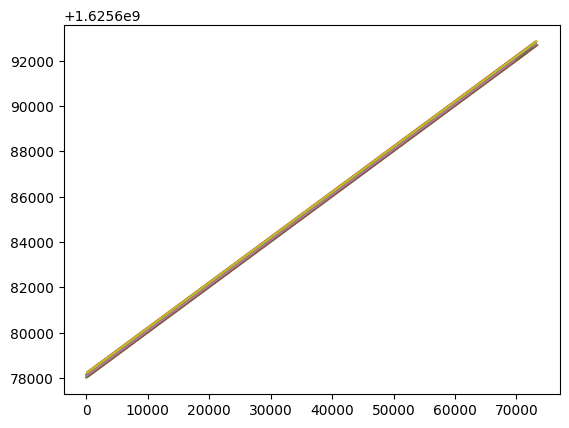

In [36]:
plt.plot(df1.time_epoch)
plt.plot(df2.time_epoch)
plt.plot(df3.time_epoch)
plt.plot(df4.time_epoch)
plt.plot(df5.time_epoch)
plt.plot(df6.time_epoch)
plt.plot(df7.time_epoch)
plt.plot(df8.time_epoch)
plt.plot(df9.time_epoch)

In [37]:
df1= process_windgps_data.parse_and_save_several_wind_strings(df1, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df2= process_windgps_data.parse_and_save_several_wind_strings(df2, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df3= process_windgps_data.parse_and_save_several_wind_strings(df3, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df4= process_windgps_data.parse_and_save_several_wind_strings(df4, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df5= process_windgps_data.parse_and_save_several_wind_strings(df5, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df6= process_windgps_data.parse_and_save_several_wind_strings(df6, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df7= process_windgps_data.parse_and_save_several_wind_strings(df7, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df8= process_windgps_data.parse_and_save_several_wind_strings(df8, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])
df9= process_windgps_data.parse_and_save_several_wind_strings(df9, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])

In [43]:
alldfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [44]:
#save files as hdfs
names=['SensorA','SensorB', 'SensorC', 'SensorD', 'SensorE', 'SensorF', 'SensorG', 'SensorH', 'SensorI']
for i in range(0,len(alldfs)):
    alldfs[i].to_hdf(names[i] + '_7.7.21', key='/windgps')


/tmp/ipykernel_2835199/1326683561.py:4: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['wind', 'gps_date_str', 'gps_time_str'], dtype='object')]

  alldfs[i].to_hdf(names[i] + '_7.7.21', key='/windgps')


In [85]:
#read in hdfs
df1=pd.read_hdf('SensorA_7.7.21')
df2=pd.read_hdf('SensorB_7.7.21')
df3=pd.read_hdf('SensorC_7.7.21')
df4=pd.read_hdf('SensorD_7.7.21')
df5=pd.read_hdf('SensorE_7.7.21')
df6=pd.read_hdf('SensorF_7.7.21')
df7=pd.read_hdf('SensorG_7.7.21')
df8=pd.read_hdf('SensorH_7.7.21')
df9=pd.read_hdf('SensorI_7.7.21')
df2

,millis,lat,lon,gps_time,gps_date,wind,gps_date_str,year,month,day,...,hour,minute,second,time_epoch,S2,D,T,U,V,W
0,1545,1000.00000,1000.000000,171430,70721,b'\xfcS2 00.160 D 156 U -00.065 V 00.146 W ...,070721,2021.0,7.0,7.0,...,17,14,30,1.625678e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,1910,1000.00000,1000.000000,171430,70721,b'\nS2 00.488 D 197 U 00.141 V 00.467 W 0...,070721,2021.0,7.0,7.0,...,17,14,30,1.625678e+09,0.488,197.0,23.05,0.141,0.467,0.187
2,2010,1000.00000,1000.000000,171430,70721,b'\nS2 00.609 D 193 U 00.139 V 00.593 W 0...,070721,2021.0,7.0,7.0,...,17,14,30,1.625678e+09,0.609,193.0,22.96,0.139,0.593,0.188
3,2110,1000.00000,1000.000000,171430,70721,b'\nS2 00.435 D 180 U 00.002 V 00.435 W 0...,070721,2021.0,7.0,7.0,...,17,14,30,1.625678e+09,0.435,180.0,23.12,0.002,0.435,0.165
4,2210,1000.00000,1000.000000,171431,70721,b'\nS2 00.336 D 158 U -00.128 V 00.311 W 0...,070721,2021.0,7.0,7.0,...,17,14,31,1.625678e+09,0.336,158.0,23.26,-0.128,0.311,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70065,14003894,39.25235,-119.878342,210025,70721,b'\nS2 01.187 D 326 U 00.664 V -00.984 W 0...,070721,2021.0,7.0,7.0,...,21,0,25,1.625692e+09,1.187,326.0,23.34,0.664,-0.984,0.118
70066,14003994,39.25235,-119.878342,210025,70721,b'\nS2 01.298 D 344 U 00.355 V -01.248 W 0...,070721,2021.0,7.0,7.0,...,21,0,25,1.625692e+09,1.298,344.0,23.43,0.355,-1.248,0.096
70067,14004094,39.25235,-119.878342,210025,70721,b'\nS2 01.102 D 344 U 00.305 V -01.059 W 0...,070721,2021.0,7.0,7.0,...,21,0,25,1.625692e+09,1.102,344.0,23.60,0.305,-1.059,0.098
70068,14004194,39.25235,-119.878342,210025,70721,b'\nS2 00.933 D 332 U 00.442 V -00.822 W 0...,070721,2021.0,7.0,7.0,...,21,0,25,1.625692e+09,0.933,332.0,23.55,0.442,-0.822,0.082


In [86]:
#ADD suffixes to each DF for all values except time_epoch

df1=df1.add_suffix('_1')
df1=df1.rename(columns={"time_epoch_1":"time"})

df2=df2.add_suffix('_2')
df2=df2.rename(columns={"time_epoch_2":"time"})

df3=df3.add_suffix('_3')
df3=df3.rename(columns={"time_epoch_3":"time"})

df4=df4.add_suffix('_4_verticallyorientated')
df4=df4.rename(columns={"time_epoch_4_verticallyorientated":"time"})

df5=df5.add_suffix('_5')
df5=df5.rename(columns={"time_epoch_5":"time"})

df6=df6.add_suffix('_6')
df6=df6.rename(columns={"time_epoch_6":"time"})

df7=df7.add_suffix('_7')
df7=df7.rename(columns={"time_epoch_7":"time"})

df8=df8.add_suffix('_8')
df8=df8.rename(columns={"time_epoch_8":"time"})

df9=df9.add_suffix('_9_verticallyorientated')
df9=df9.rename(columns={"time_epoch_9_verticallyorientated":"time"})

In [87]:
df1

,millis_1,lat_1,lon_1,gps_time_1,gps_date_1,wind_1,gps_date_str_1,year_1,month_1,day_1,...,hour_1,minute_1,second_1,time,S2_1,D_1,T_1,U_1,V_1,W_1
115,22972,1000.000000,1000.000000,171552,70721,b'\nS2 02.654 D 241 U 02.317 V 01.294 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.654,241.0,23.40,2.317,1.294,0.052
116,23072,1000.000000,1000.000000,171552,70721,b'\nS2 02.882 D 236 U 02.390 V 01.611 W -0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.882,236.0,23.33,2.390,1.611,-0.023
117,23172,1000.000000,1000.000000,171552,70721,b'\nS2 02.895 D 232 U 02.279 V 01.785 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.895,232.0,23.34,2.279,1.785,0.047
118,23272,1000.000000,1000.000000,171552,70721,b'\nS2 03.068 D 230 U 02.361 V 01.958 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,3.068,230.0,23.44,2.361,1.958,0.059
119,23372,1000.000000,1000.000000,171552,70721,b'\nS2 02.930 D 231 U 02.265 V 01.857 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.930,231.0,23.41,2.265,1.857,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72485,14486595,39.252419,-119.878304,211653,70721,b'\nS2 01.428 D 155 U -00.598 V 01.296 W 0...,070721,2021.0,7.0,7.0,...,21,16,53,1.625693e+09,1.428,155.0,24.60,-0.598,1.296,0.245
72486,14486695,39.252419,-119.878304,211654,70721,b'\nS2 01.620 D 161 U -00.523 V 01.533 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.620,161.0,24.23,-0.523,1.533,0.292
72487,14486795,39.252419,-119.878304,211654,70721,b'\nS2 01.354 D 151 U -00.667 V 01.179 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.354,151.0,24.26,-0.667,1.179,0.584
72488,14486895,39.252419,-119.878304,211654,70721,b'\nS2 01.301 D 143 U -00.778 V 01.043 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.301,143.0,24.44,-0.778,1.043,0.387


In [88]:
decimals = 1
df1['time']=df1['time'].apply(lambda x: round(x, decimals))
df2['time']=df2['time'].apply(lambda x: round(x, decimals))
df3['time']=df3['time'].apply(lambda x: round(x, decimals))
df4['time']=df4['time'].apply(lambda x: round(x, decimals))
df5['time']=df5['time'].apply(lambda x: round(x, decimals))
df6['time']=df6['time'].apply(lambda x: round(x, decimals))
df7['time']=df7['time'].apply(lambda x: round(x, decimals))
df8['time']=df8['time'].apply(lambda x: round(x, decimals))
df9['time']=df9['time'].apply(lambda x: round(x, decimals))

In [89]:
df1

,millis_1,lat_1,lon_1,gps_time_1,gps_date_1,wind_1,gps_date_str_1,year_1,month_1,day_1,...,hour_1,minute_1,second_1,time,S2_1,D_1,T_1,U_1,V_1,W_1
115,22972,1000.000000,1000.000000,171552,70721,b'\nS2 02.654 D 241 U 02.317 V 01.294 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.654,241.0,23.40,2.317,1.294,0.052
116,23072,1000.000000,1000.000000,171552,70721,b'\nS2 02.882 D 236 U 02.390 V 01.611 W -0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.882,236.0,23.33,2.390,1.611,-0.023
117,23172,1000.000000,1000.000000,171552,70721,b'\nS2 02.895 D 232 U 02.279 V 01.785 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.895,232.0,23.34,2.279,1.785,0.047
118,23272,1000.000000,1000.000000,171552,70721,b'\nS2 03.068 D 230 U 02.361 V 01.958 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,3.068,230.0,23.44,2.361,1.958,0.059
119,23372,1000.000000,1000.000000,171552,70721,b'\nS2 02.930 D 231 U 02.265 V 01.857 W 0...,070721,2021.0,7.0,7.0,...,17,15,52,1.625678e+09,2.930,231.0,23.41,2.265,1.857,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72485,14486595,39.252419,-119.878304,211653,70721,b'\nS2 01.428 D 155 U -00.598 V 01.296 W 0...,070721,2021.0,7.0,7.0,...,21,16,53,1.625693e+09,1.428,155.0,24.60,-0.598,1.296,0.245
72486,14486695,39.252419,-119.878304,211654,70721,b'\nS2 01.620 D 161 U -00.523 V 01.533 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.620,161.0,24.23,-0.523,1.533,0.292
72487,14486795,39.252419,-119.878304,211654,70721,b'\nS2 01.354 D 151 U -00.667 V 01.179 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.354,151.0,24.26,-0.667,1.179,0.584
72488,14486895,39.252419,-119.878304,211654,70721,b'\nS2 01.301 D 143 U -00.778 V 01.043 W 0...,070721,2021.0,7.0,7.0,...,21,16,54,1.625693e+09,1.301,143.0,24.44,-0.778,1.043,0.387


In [90]:
dfs=[df1, df2,df3, df4,df5, df6,df7,df8,df9]

In [81]:
#round all dfs to 1 decimal (based on 10Hz sampling rate)
decimals = 1
for i in range(0,len(dfs)):
    dfs[i]['time'] = dfs[i]['time'].apply(lambda x: round(x, decimals))
             

In [100]:
df_merged = reduce(lambda left, right: pd.merge(left, 
                            right, on=['time'], how='inner'), dfs)

In [101]:
df_merged

,millis_1,lat_1,lon_1,gps_time_1,gps_date_1,wind_1,gps_date_str_1,year_1,month_1,day_1,...,hour_9_verticallyorientated,minute_9_verticallyorientated,second_9_verticallyorientated,time,S2_9_verticallyorientated,D_9_verticallyorientated,T_9_verticallyorientated,U_9_verticallyorientated,V_9_verticallyorientated,W_9_verticallyorientated


In [83]:
df_merged = df_merged.interpolate()

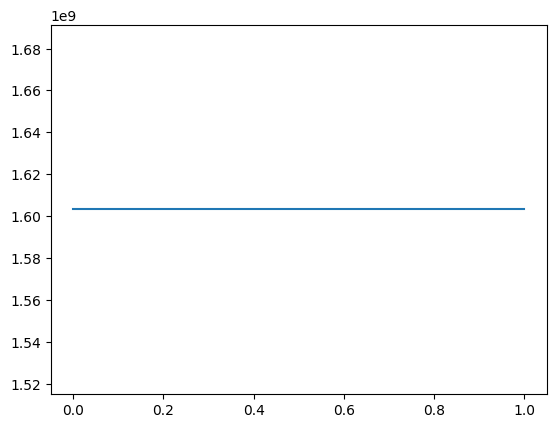

In [25]:
plt.plot(df_merged.time)

In [35]:
dt_wind = np.median(np.diff(df_merged.time.dropna().values))
print('dt Wind: ', dt_wind)

first_time = np.min([df_merged.time])
last_time = np.max([df_merged.time])
print(first_time,last_time)
master_time = np.arange(first_time, last_time, dt_wind)


dt Wind:  0.09999990463256836
1654634904.6 1654638172.6


In [36]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [47]:
print(df_merged.lat_2.mode(), df_merged.lon_2.mode())
#print(df_merged.lat_3, df_merged.lon_3)
print(df_merged.lat_4_verticallyorientated.mode(), df_merged.lon_4_verticallyorientated.mode())
print(df_merged.lat_5.mode(), df_merged.lon_5.mode())
print(df_merged.lat_6.mode(), df_merged.lon_6.mode())
print(df_merged.lat_7.mode(), df_merged.lon_7.mode())
print(df_merged.lat_8.mode(), df_merged.lon_8.mode())
print(df_merged.lat_9_verticallyorientated.mode(), df_merged.lon_9_verticallyorientated.mode())

0    39.247498
dtype: float32 0   -119.876381
dtype: float32
0    39.247383
dtype: float32 0   -119.876724
dtype: float32
0    39.246689
dtype: float32 0   -119.876495
dtype: float32
0    39.247173
dtype: float32 0   -119.876205
dtype: float32
0    39.24688
dtype: float32 0   -119.876289
dtype: float32
0    39.247993
dtype: float32 0   -119.876579
dtype: float32
0    39.248001
dtype: float32 0   -119.876495
dtype: float32


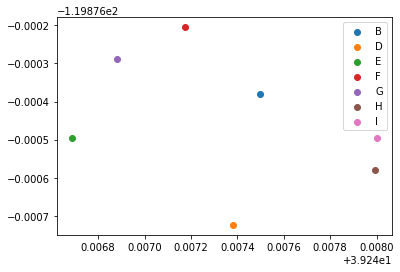

In [83]:
plt.scatter(39.247498, -119.876381, label='B')
plt.scatter(39.247383, -119.876724, label='D')
plt.scatter(39.246689,  -119.876495, label='E')
plt.scatter(39.247173, -119.876205, label='F')
plt.scatter(39.24688, -119.876289, label='G')
plt.scatter(39.247993,  -119.876579, label='H')
plt.scatter( 39.248001,  -119.876495, label='I')
plt.legend(bbox_to_anchor=(1,1))

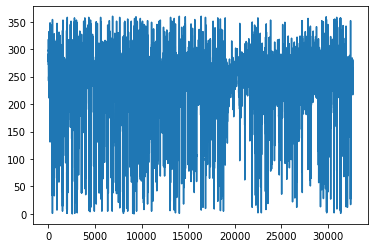

In [86]:
plt.plot(df_merged.D_4_verticallyorientated)

In [87]:
#forest 6/7/22-6/8/22
F3_B=(39.247462, -119.876435)
F3_D=(39.247155, -119.876133)
F3_E=(39.247155, -119.876133)
F3_F=(39.246921, -119.876330)
F3_G=(39.246664, -119.876518)
F3_H=(39.248047,-119.876488)
F3_I=(39.248009, -119.87648)

In [49]:
import math

In [88]:
x,y,z=latlon_to_xyz(39.247155, -119.876133)

In [168]:
day2=df_merged.iloc[655000:-1]

In [169]:
day2=day2.reset_index(inplace=False)
day2=day2.drop(columns='index')

In [93]:
import time

In [116]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df_merged.time.iloc[184998]))

#time.localtime(df.time.iloc[0]).tm_min

'2022-06-07 18:56:46'

In [136]:
day1.X_2

0        -2457.69647
1        -2457.69647
2        -2457.69647
3        -2457.69647
4        -2457.69647
             ...    
184992   -2457.69647
184993   -2457.69647
184994   -2457.69647
184995   -2457.69647
184996   -2457.69647
Name: X_2, Length: 184997, dtype: float64

In [134]:
dftest.X_2

0        -2457.69647
1        -2457.69647
2        -2457.69647
3        -2457.69647
4        -2457.69647
             ...    
184993   -2457.69647
184994   -2457.69647
184995   -2457.69647
184996   -2457.69647
184997   -2457.69647
Name: X_2, Length: 184998, dtype: float64

In [138]:
pd.set_option('display.max_columns', 1000)

In [144]:
len(day1)

184997

In [163]:
day2.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/6.8.22_all.hdf', key='/windgps')

In [170]:
df=day2.drop(columns={#'lat_1', 'lon_1',
                   'lat_2', 'lon_2',
                   #'lat_3', 'lon_3',
                   # 'lat_4', 'lon_4',
                   #'lat_4_verticallyorientated', 'lon_4_verticallyorientated',
                   'lat_5', 'lon_5',
                   'lat_6', 'lon_6',
                    'lat_7', 'lon_7',
                   #'lat_7_verticallyorientated', 'lon_7_verticallyorientated',
                   'lat_8', 'lon_8',
                   # 'lat_9', 'lon_9',
                   #'lat_8_verticallyorientated', 'lon_8_verticallyorientated',
                   'lat_9_verticallyorientated', 'lon_9_verticallyorientated',
                    })

In [171]:
#df.X_1=df.X_1+2400
df.X_2=df.X_2+2400
#df.X_3=df.X_3+2400
#df.X_4=df.X_4+2400
#df.X_4_verticallyorientated=df.X_4_verticallyorientated+2400
df.X_5=df.X_5+2400
df.X_6=df.X_6+2400
df.X_7=df.X_7+2400
#df.X_7_verticallyorientated=df.X_7_verticallyorientated+2400
df.X_8=df.X_8+2400
#df.X_8_verticallyorientated=df.X_8_verticallyorientated+2400
#df.X_9=df.X_9+2400
df.X_9_verticallyorientated=df.X_9_verticallyorientated+2400

#df.Y_1=df.Y_1+4300
df.Y_2=df.Y_2+4300
#df.Y_3=df.Y_3+4300
#df.Y_4=df.Y_4+4300
#df.Y_4_verticallyorientated=df.Y_4_verticallyorientated+4300
df.Y_5=df.Y_5+4300
df.Y_6=df.Y_6+4300
df.Y_7=df.Y_7+4300
#df.Y_7_verticallyorientated=df.Y_7_verticallyorientated+4300
df.Y_8=df.Y_8+4300
#df.Y_8_verticallyorientated=df.Y_8_verticallyorientated+4300
#df.Y_9=df.Y_9+4300
df.Y_9_verticallyorientated=df.Y_9_verticallyorientated+4300

#df.Z_1=df.Z_1-4000
df.Z_2=df.Z_2-4000
#df.Z_3=df.Z_3-4000
#df.Z_4=df.Z_4-4000
#df.Z_4_verticallyorientated=df.Z_4_verticallyorientated-4000
df.Z_5=df.Z_5-4000
df.Z_6=df.Z_6-4000
df.Z_7=df.Z_7-4000
#df.Z_7_verticallyorientated=df.Z_7_verticallyorientated-4000
df.Z_8=df.Z_8-4000
#df.Z_8_verticallyorientated=df.Z_8_verticallyorientated-4000
#df.Z_9=df.Z_9-4000
df.Z_9_verticallyorientated=df.Z_9_verticallyorientated-4000

In [172]:
#print('A:', df.X_1.iloc[0],df.Y_1.iloc[0],df.Z_1.iloc[0])
print('B:', df.X_2.iloc[0],df.Y_2.iloc[0],df.Z_2.iloc[0])
#print('C:',df.X_3.iloc[0],df.Y_3.iloc[0],df.Z_3.iloc[0])
#print('D:',df.X_4.iloc[0],df.Y_4.iloc[0],df.Z_4.iloc[0])
#print('D:',df.X_4_verticallyorientated.iloc[0],df.Y_4_verticallyorientated.iloc[0],df.Z_4_verticallyorientated.iloc[0])
print('E:',df.X_5.iloc[0],df.Y_5.iloc[0],df.Z_5.iloc[0])
print('F:',df.X_6.iloc[0],df.Y_6.iloc[0],df.Z_6.iloc[0])
print('G:',df.X_7.iloc[0],df.Y_7.iloc[0],df.Z_7.iloc[0])
print('H:',df.X_8.iloc[0],df.Y_8.iloc[0],df.Z_8.iloc[0])
#print('H:',df.X_8_verticallyorientated.iloc[0],df.Y_8_verticallyorientated.iloc[0],df.Z_8_verticallyorientated.iloc[0])
print('I:',df.X_9_verticallyorientated.iloc[0],df.Y_9_verticallyorientated.iloc[0],df.Z_9_verticallyorientated.iloc[0])

B: -57.69646999999986 21.864088999999694 30.74710099999993
E: -57.684678000000076 21.832408000000214 30.720664999999826
F: -57.707588000000214 21.826584000000366 30.700514000000112
G: -57.73063199999979 21.81897200000003 30.67838699999993
H: -57.679927000000134 21.902047999999922 30.797476000000188
I: -57.68066099999987 21.899387000000388 30.79420399999981


In [173]:
df.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for public)/6.8.22_maskedgpsdata.hdf', key='/windgps')

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['wind_2', 'gps_date_str_2', 'gps_time_str_2', 'wind_5',
       'gps_date_str_5', 'gps_time_str_5', 'wind_6', 'gps_date_str_6',
       'gps_time_str_6', 'wind_7', 'gps_date_str_7', 'gps_time_str_7',
       'wind_8', 'gps_date_str_8', 'gps_time_str_8',
       'wind_9_verticallyorientated', 'gps_date_str_9_verticallyorientated',
       'gps_time_str_9_verticallyorientated'],
      dtype='object')]

  pytables.to_hdf(


In [175]:
df2=df[['time',
        #'S2_1', 'D_1','X_1','Y_1','Z_1',
        'S2_2', 'D_2','X_2','Y_2','Z_2',
        #'S2_3', 'D_3','X_3', 'Y_3','Z_3',
       # 'S2_4_verticallyorientated', 'D_4_verticallyorientated','X_4_verticallyorientated', 'Y_4_verticallyorientated','Z_4_verticallyorientated',
        #'S2_4', 'D_4', 'X_4','Y_4', 'Z_4',
        'S2_5', 'D_5', 'X_5','Y_5', 'Z_5',
        'S2_6',  'D_6', 'X_6','Y_6','Z_6',
        'S2_7',  'D_7', 'X_7','Y_7','Z_7',
        'S2_8', 'D_8','X_8',  'Y_8', 'Z_8',
       # 'S2_9', 'D_9','X_9',  'Y_9', 'Z_9',
       # 'S2_7_verticallyorientated', 'D_7_verticallyorientated','X_7_verticallyorientated',  'Y_7_verticallyorientated', 'Z_7_verticallyorientated',
        'S2_9_verticallyorientated','D_9_verticallyorientated','X_9_verticallyorientated','Y_9_verticallyorientated','Z_9_verticallyorientated',
       #'U_4_verticallyorientated','V_4_verticallyorientated', 
       #'U_8_verticallyorientated','V_8_verticallyorientated', 
       'U_9_verticallyorientated', 'V_9_verticallyorientated',
    
       ]]

In [176]:
df2.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data for me/small_6.8.22_maskedgpsdata.hdf', key='/windgps')

In [148]:
len(dftest)

134794

In [160]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df_merged.time.iloc[655000]))

#time.localtime(df.time.iloc[0]).tm_min

'2022-06-08 08:00:05'

In [ ]:
fnameMerged = 'Merged_10.20.20' + 'windgps_data.hdf'
full_fnameMerged = os.path.join('/Users/Desktop/', fnameMerged)
df_merged.to_hdf(full_fnameMerged, 'windgps')

In [ ]:
dfsmall=df_merged[["time","D_2","D_5","D_6", "D_7", "D_8", "D_9", "S2_2", "S2_5", "S2_6", "S2_7", "S2_8", "S2_9"]]

In [ ]:
fnameSmall = 'SpeedandDirection_10.20.20' + 'windgps_data.hdf'
full_fnameSmall = os.path.join('/Users/Desktop/', fnameSmall)
dfsmall.to_hdf(full_fnameSmall, 'windgps')

In [ ]:
dflatlon=df_merged[["time", "lat_2", "lon_2", "lat_5", "lon_5", "lat_6", "lon_6",  "lat_7", "lon_7", "lat_8", "lon_8", "lat_9", "lon_9"]]

In [ ]:
fnameLatLons = 'LatLons_10.20.20' + 'windgps_data.hdf'
full_fnameLatLons = os.path.join('/Users/Desktop/', fnameLatLons)
dflatlon.to_hdf(full_fnameLatLons, 'windgps')
